In [1]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('./npm-github-depencies-raw-data.csv')
df.describe()

,GitHub Star,GitHub Forks,GitHub Watchers,Code Coverage %,Linters,Dependenats,NPM Stars,Maintainers,Contributors,Dependencies,Total Issues,Open Issues,Security Advisories
count,9787.000000,9787.000000,9787.000000,1941.000000,9787.000000,9782.000000,9782.000000,9787.000000,9787.000000,9787.000000,9133.000000,9581.000000,9787.000000
mean,2697.514969,702.143864,132.744048,0.861458,0.908961,340.032611,14.596810,2.495964,1.322060,3.407990,489.361875,41.535957,1.316542
std,11443.887065,6741.811629,1359.604076,0.233112,0.989103,2243.673670,63.837118,4.994976,15.337463,6.475408,1928.794511,155.539347,4.882278
min,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,4.000000,2.000000,0.870000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000
50%,78.000000,18.000000,7.000000,0.960000,1.000000,32.000000,2.000000,1.000000,0.000000,2.000000,35.000000,5.000000,0.000000
75%,503.000000,86.000000,22.000000,1.000000,2.000000,128.000000,9.000000,2.000000,0.000000,4.000000,151.000000,19.000000,0.000000
max,190694.000000,178621.000000,36193.000000,1.000000,5.000000,102292.000000,2577.000000,222.000000,952.000000,143.000000,42674.000000,5673.000000,87.000000


In [3]:
df.columns = ['dependency_name', 'repository', 'github_star', 'gitub_forks', 'github_watchers', 'abondoned', 'code_coverage', 'linters', 'dependenats', 'npm_stars', 'maintainers', 'contributors', 'dependenies', 'license', 'total_issues', 'open_issues', 'security_advisories']
df.head(30)

# dependency_name        название репозитория (Номинальная)
# repository             ссылка на репозиторий (Номинальная)
# github_star            количество звезд на Github (Количественная Группируюшая)
# gitub_forks            количество форков на Github (Количественная отклик)
# github_watchers        количество watcher на Github (Количественная отклик)
# abondoned              заброшен (Дихотомическая)
# code_coverage          покрытие кода (Ранговая)
# linters                линтнеры (Ранговая)
# dependenats            иждивенцы (Количественная отклик)
# npm_stars              количество звезд на npm (Количественная группирующая)
# maintainers            сопровождающие (Количественная)
# contributors           количество контрибьюторов (Количественная группирующая)
# dependenies            количество зависимостей (Количественная)
# license                лицензия (Номинальная)
# total_issues           всего issues (Количественная)
# open_issues            не закрыто issues (Количественная)
# security_advisories    количество рекомендаций по безопасности (Количественная)

,dependency_name,repository,github_star,gitub_forks,github_watchers,abondoned,code_coverage,linters,dependenats,npm_stars,maintainers,contributors,dependenies,license,total_issues,open_issues,security_advisories
0,mocha,https://github.com/mochajs/mocha,20919,2904,395,False,0.94,3,6929.0,704.0,4,530,24,MIT,4732.0,264.0,0
1,chai,https://github.com/chaijs/chai,7421,674,127,False,0.95,0,6230.0,317.0,2,4,6,MIT,1417.0,74.0,0
2,lodash,https://github.com/lodash/lodash,51471,6123,877,False,0.33,0,102292.0,1520.0,3,2,0,MIT,5165.0,315.0,0
3,grunt,https://github.com/gruntjs/grunt,12128,1529,515,False,NaN,1,2147.0,692.0,4,5,15,MIT,1720.0,155.0,0
4,eslint,https://github.com/eslint/eslint,19564,3501,306,False,0.69,2,13016.0,334.0,4,0,38,MIT,14848.0,112.0,0
5,gulp,https://github.com/gulpjs/gulp,32398,4402,1091,False,1.00,2,7544.0,1425.0,2,2,4,MIT,2512.0,26.0,1
6,babel-preset-es2015,https://github.com/babel/babel,37268,4427,867,False,0.91,3,5390.0,84.0,4,0,24,MIT,11879.0,789.0,0
7,request,https://github.com/request/request,25400,3100,444,False,0.97,1,40898.0,1502.0,4,0,20,Apache-2.0,2213.0,86.0,0
8,async,https://github.com/caolan/async,27378,2414,689,False,0.99,2,24376.0,1210.0,5,0,0,MIT,1767.0,10.0,0
9,istanbul,https://github.com/gotwarlost/istanbul,8477,816,133,False,0.98,1,871.0,221.0,3,78,14,BSD-3-Clause,944.0,396.0,0


In [4]:
df.dtypes

dependency_name         object
repository              object
github_star              int64
gitub_forks              int64
github_watchers          int64
abondoned                 bool
code_coverage          float64
linters                  int64
dependenats            float64
npm_stars              float64
maintainers              int64
contributors             int64
dependenies              int64
license                 object
total_issues           float64
open_issues            float64
security_advisories      int64
dtype: object

In [5]:
len(df)

9787

In [6]:
df.isnull().sum()

dependency_name           0
repository                0
github_star               0
gitub_forks               0
github_watchers           0
abondoned                 0
code_coverage          7846
linters                   0
dependenats               5
npm_stars                 5
maintainers               0
contributors              0
dependenies               0
license                 668
total_issues            654
open_issues             206
security_advisories       0
dtype: int64

In [7]:
def f(lst):
  elems = {}
  e, em = None, 0
  for i in lst:
    elems[i] = t = elems.get(i, 0) + 1
    if t > em:
      e, em = i, t
      return e

In [8]:
df.drop('code_coverage', inplace=True, axis=1) # Удаления признака

# Заполнение средним остальных пропусков.
df['dependenats'] = df['dependenats'].fillna(df['dependenats'].mean())
df['npm_stars'] = df['npm_stars'].fillna(df['npm_stars'].mean())
df['license'] = df['license'].fillna(f(df.license))
df['total_issues'] = df['total_issues'].fillna(df['total_issues'].mean())
df['open_issues'] = df['open_issues'].fillna(df['open_issues'].mean())

df.dropna()

,dependency_name,repository,github_star,gitub_forks,github_watchers,abondoned,linters,dependenats,npm_stars,maintainers,contributors,dependenies,license,total_issues,open_issues,security_advisories
0,mocha,https://github.com/mochajs/mocha,20919,2904,395,False,3,6929.0,704.0,4,530,24,MIT,4732.000000,264.0,0
1,chai,https://github.com/chaijs/chai,7421,674,127,False,0,6230.0,317.0,2,4,6,MIT,1417.000000,74.0,0
2,lodash,https://github.com/lodash/lodash,51471,6123,877,False,0,102292.0,1520.0,3,2,0,MIT,5165.000000,315.0,0
3,grunt,https://github.com/gruntjs/grunt,12128,1529,515,False,1,2147.0,692.0,4,5,15,MIT,1720.000000,155.0,0
4,eslint,https://github.com/eslint/eslint,19564,3501,306,False,2,13016.0,334.0,4,0,38,MIT,14848.000000,112.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,easyreq,https://github.com/gavinning/aimee-extend,0,0,1,False,0,13.0,0.0,1,0,1,GPL-3.0,0.000000,0.0,0
9783,aimee-extend,https://github.com/coolaj86/abstract-http-request,50,6,3,False,0,10.0,1.0,1,1,9,MIT,29.000000,10.0,0
9784,ahr2,https://github.com/haraldrudell/mochawrapper,16,2,2,False,0,1.0,0.0,1,1,5,MIT,0.000000,0.0,0
9785,mochawrapper,https://github.com/jcrugzz/back,26,6,2,False,0,27.0,0.0,1,1,1,MIT,6.000000,0.0,8


In [9]:
df.isnull().sum()

dependency_name        0
repository             0
github_star            0
gitub_forks            0
github_watchers        0
abondoned              0
linters                0
dependenats            0
npm_stars              0
maintainers            0
contributors           0
dependenies            0
license                0
total_issues           0
open_issues            0
security_advisories    0
dtype: int64

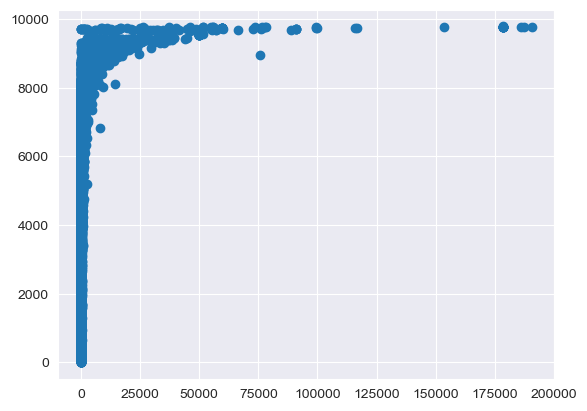

In [10]:
df_1= df.sort_values('github_watchers')

m = []
for i in range(9787):
    m.append(i)
    
plt.scatter(df_1['github_star'], m)

In [11]:
df_d = list(filter(lambda n: n > 150000, df['github_star']))
d = list(map(lambda n: df.loc[df['github_star'] == n], df_d))
len(d)

17

            dependency_name  \
6339  fh-wfm-template-build   
4597       uupaa.console.js   
4596      gulp-cirru-script   
7929      structured-source   
6853            colorbrewer   
...                     ...   
8                     async   
5                      gulp   
7                   request   
2                    lodash   
11                  express   

                                             repository  github_star  \
6339  https://github.com/feedhenry-raincatcher/rainc...            0   
4597                https://github.com/uupaa/Console.js            1   
4596         https://github.com/Cirru/gulp-cirru-script            1   
7929           https://github.com/fender-guy/es6-mixins           15   
6853            https://github.com/saikocat/colorbrewer           31   
...                                                 ...          ...   
8                       https://github.com/caolan/async        27378   
5                        https://github.com/gulpjs/

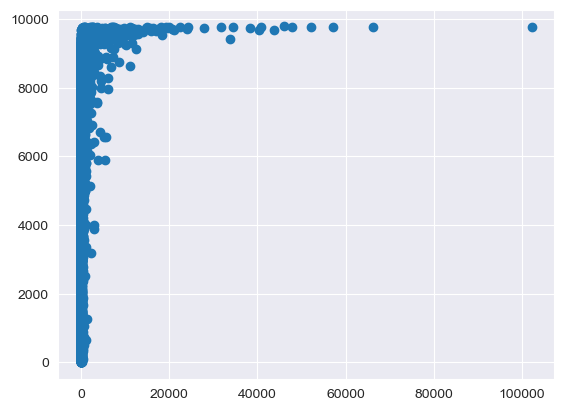

In [12]:
df_2= df.sort_values('npm_stars')
print(df_2)

m = []
for i in range(9787):
    m.append(i)
    
plt.scatter(df_2['dependenats'], m)

In [13]:
df['dependenats'].describe()
df_d = filter(lambda n: n > 80000, df['dependenats'])
list(df_d)

[102292.0]

                 dependency_name  \
4893  babel-plugin-react-require   
5769                       flags   
5768            gitignore-parser   
9131                     dataset   
5766                   tinycolor   
...                          ...   
212                          koa   
36                         karma   
0                          mocha   
267                          npm   
681                   codemirror   

                                             repository  github_star  \
4893  https://github.com/vslinko/babel-plugin-react-...          157   
5769                 https://github.com/dpup/node-flags           25   
5768        https://github.com/codemix/gitignore-parser           82   
9131     https://github.com/wejs/we-theme-admin-default            1   
5766               https://github.com/einaros/tinycolor           16   
...                                                 ...          ...   
212                        https://github.com/koajs/koa        

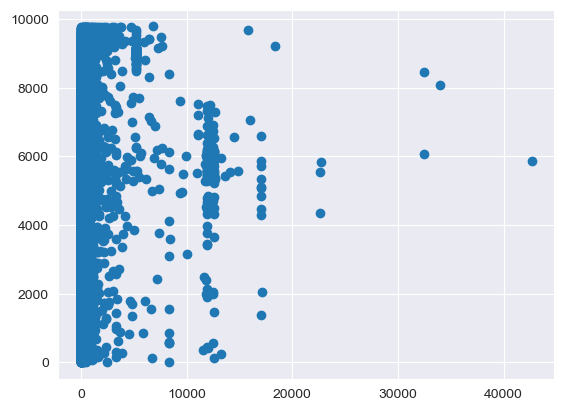

In [14]:
df_2= df.sort_values('contributors')
print(df_2)

m = []
for i in range(9787):
    m.append(i)
    
plt.scatter(df_2['total_issues'], m)


In [15]:
df['total_issues'].describe()
df_d = filter(lambda n: n > 30000, df['total_issues'])
list(df_d)

[33956.0, 32466.0, 42674.0, 32430.0]

             dependency_name  \
8211            node-libcurl   
7141              hubot-auth   
7386            help-me-test   
7847            mockfirebase   
7782                 nokitjs   
...                      ...   
896                    serve   
3783                     now   
3558                     pbf   
7804                 replify   
3484  metalsmith-collections   

                                             repository  github_star  \
8211             https://github.com/JCMais/node-libcurl          482   
7141        https://github.com/hubot-scripts/hubot-auth          148   
7386            https://github.com/sethmcl/help-me-test            0   
7847           https://github.com/katowulf/mockfirebase          157   
7782                   https://github.com/nokitjs/nokit           63   
...                                                 ...          ...   
896                     https://github.com/vercel/serve         7379   
3783                   https://github.c

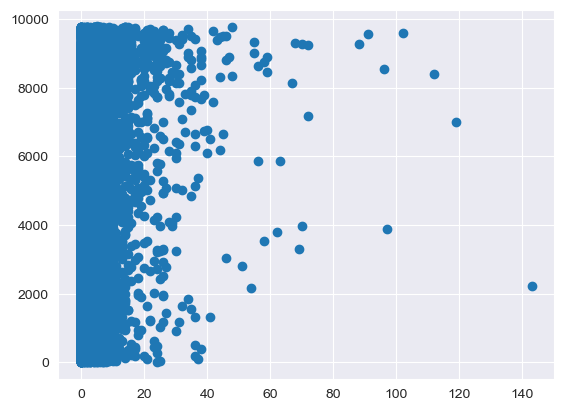

In [16]:
df_2= df.sort_values('maintainers')
print(df_2)

m = []
for i in range(9787):
    m.append(i)
    
plt.scatter(df_2['dependenies'], m)

In [17]:
df['dependenies'].describe()
df_d = filter(lambda n: n > 100, df['dependenies'])
list(df_d)

df_d = list(filter(lambda n: n > 150000, df['github_star']))
d = list(map(lambda n: df.loc[df['github_star'] == n], df_d))
d

[          dependency_name                         repository  github_star  \
 24                  react  https://github.com/facebook/react       178544   
 1719  react-test-renderer  https://github.com/facebook/react       178544   
 
       gitub_forks  github_watchers  abondoned  linters  dependenats  \
 24          36180             6659      False        3      57239.0   
 1719        36180             6659      False        3       1016.0   
 
       npm_stars  maintainers  contributors  dependenies license  total_issues  \
 24        774.0            8             0            2     MIT       22583.0   
 1719       25.0            9             0            4     MIT       22583.0   
 
       open_issues  security_advisories  
 24          906.0                    0  
 1719        906.0                    0  ,
                         dependency_name                         repository  \
 44                            react-dom  https://github.com/facebook/react   
 114         

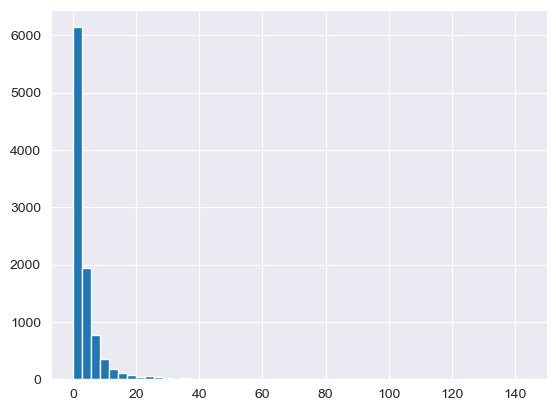

In [18]:
arr = df['dependenies']
n, bins, patches = plt.hist(arr, 50) 

In [19]:
scipy.stats.normaltest(df['dependenies'])

NormaltestResult(statistic=12248.197577486882, pvalue=0.0)

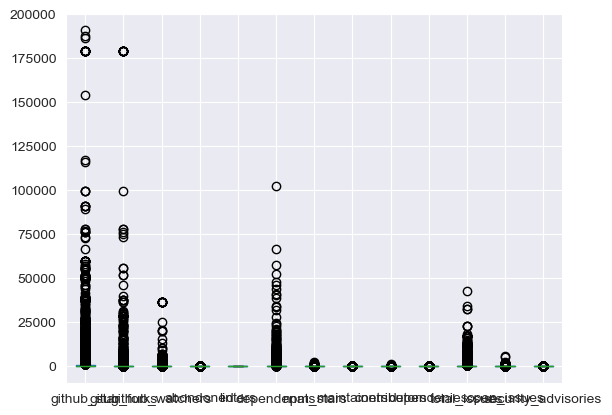

In [20]:
dff = df
dff.drop('dependency_name', inplace=True, axis=1)
dff.drop('repository', inplace=True, axis=1)
dff.drop('license', inplace=True, axis=1)

boxplot = dff.boxplot()

In [21]:
dff=df
per_left = np.percentile(dff.github_star, 5)
per_right = np.percentile(dff.github_star, 95)
ind_missing=[]

for i in range(len(df)):
    if dff.github_star[i] < per_left or dff.github_star[i] > per_right or dff .dependenats[i] > 60000 or df.total_issues[i] > 30000 or dff.dependenies[i] > 100:
        ind_missing.append(i)

data11 = dff.drop(ind_missing, axis=0) 
data11.describe()

,github_star,gitub_forks,github_watchers,linters,dependenats,npm_stars,maintainers,contributors,dependenies,total_issues,open_issues,security_advisories
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,674.331317,129.928941,29.677153,0.872841,221.136637,11.015728,2.459245,1.136289,3.287207,176.120780,19.913651,1.323617
std,1743.529269,581.883365,139.199289,0.961698,1052.098419,34.742427,5.116612,10.726463,5.817873,471.460932,56.726068,4.821545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,4.000000,2.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000
50%,71.000000,17.000000,6.000000,1.000000,30.000000,2.000000,1.000000,0.000000,2.000000,35.000000,4.000000,0.000000
75%,374.000000,68.000000,18.000000,2.000000,115.000000,8.000000,2.000000,0.000000,4.000000,147.000000,15.000000,0.000000
max,12848.000000,12848.000000,5321.000000,5.000000,38385.000000,702.000000,222.000000,807.000000,97.000000,12546.000000,1203.000000,82.000000


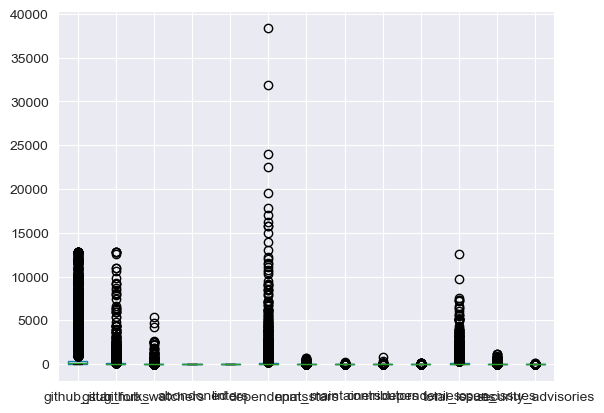

In [22]:
boxplot = data11.boxplot()

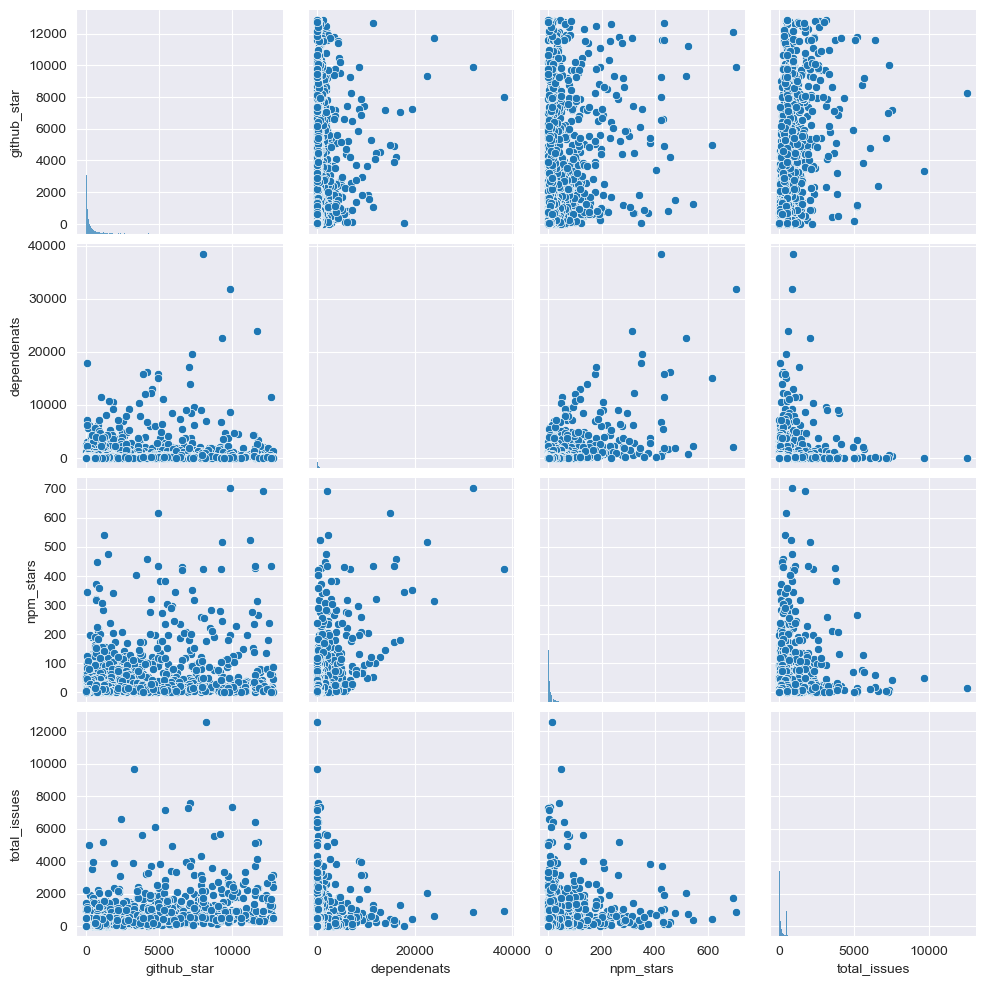

In [23]:
# del(data11['dependency_name'])
# del(data11['repository'])
# del(data11['github_star'])
del(data11['gitub_forks'])
del(data11['github_watchers'])
del(data11['abondoned'])
del(data11['linters'])
# del(data11['dependenats'])
del(data11['maintainers']) 
del(data11['contributors'])
del(data11['dependenies'])
# del(data11['total_issues'])
del(data11['open_issues'])
del(data11['security_advisories'])

sns.pairplot(data11)

#fix

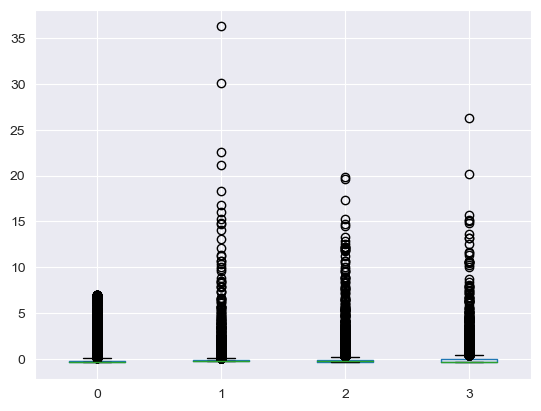

In [24]:
scaler = StandardScaler() 
data11=pd.DataFrame(scaler.fit_transform(data11))
boxplot = data11.boxplot()

In [25]:
data11.describe()

,0,1,2,3
count,9.091000e+03,9.091000e+03,9.091000e+03,9.091000e+03
mean,-8.787383e-16,-5.219856e-17,-3.058285e-15,-4.693321e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-3.867835e-01,-2.101978e-01,-3.170859e-01,-3.735844e-01
25%,-3.793270e-01,-2.006925e-01,-3.170859e-01,-3.566150e-01
50%,-3.460593e-01,-1.816818e-01,-2.595162e-01,-2.993430e-01
75%,-1.722643e-01,-1.008864e-01,-8.680723e-02,-6.177051e-02
max,6.982583e+00,3.627604e+01,1.988987e+01,2.623878e+01
